# Audio features

#### 📦 Step 1: Import Required Libraries

In [1]:
import librosa
import requests
import tempfile
import matplotlib.pyplot as plt
import numpy as np

#### 📂 Step 2: Load Audio File

In [ ]:
# Download the audio file from GitHub
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/5_Datafication/data/audio/car-engine-fail.mp3"
response = requests.get(url)

# Write the content to a temporary file
with tempfile.NamedTemporaryFile(suffix=".mp3", delete=False) as tmp_file:
    tmp_file.write(response.content)
    tmp_path = tmp_file.name

# Load the audio using librosa
y, sr = librosa.load(tmp_path, sr=None)

# Display audio info
print(f"Audio loaded from: {url}")
print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds, Sampling Rate: {sr} Hz")

Audio loaded from: https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/5_Datafication/data/audio/car-engine-fail.mp3
Duration: 3.08 seconds, Sampling Rate: 44100 Hz


In [9]:
# ## Or read from local file if already downloaded
# audio_path = "data/car-engine-fail.mp3" # Load the audio file 
# # sr=None preserves the original sampling rate 
# y, sr = librosa.load(audio_path, sr=None) 
# # Display basic info 
# print(f"Audio loaded: {audio_path}") 
# print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds, Sampling Rate: {sr} Hz")

#### 🎼 Step 3: Extract Pitch (F0) using librosa.yin

'fmin' and 'fmax' set expected pitch range for car engines (can be tuned)

In [4]:
pitch = librosa.yin(y, fmin=50, fmax=1000, sr=sr)
times_pitch = librosa.times_like(pitch, sr=sr)

#### 🔊 Step 4: Compute Spectral Energy

Energy = sum of squared amplitude values in short windows

In [5]:
frame_length = 2048
hop_length = 512
energy = np.array([
    np.sum(np.abs(y[i:i+frame_length])**2)
    for i in range(0, len(y), hop_length)
])
times_energy = librosa.frames_to_time(range(len(energy)), sr=sr, hop_length=hop_length)

In [6]:
times_energy

array([0.        , 0.01160998, 0.02321995, 0.03482993, 0.04643991,
       0.05804989, 0.06965986, 0.08126984, 0.09287982, 0.1044898 ,
       0.11609977, 0.12770975, 0.13931973, 0.15092971, 0.16253968,
       0.17414966, 0.18575964, 0.19736961, 0.20897959, 0.22058957,
       0.23219955, 0.24380952, 0.2554195 , 0.26702948, 0.27863946,
       0.29024943, 0.30185941, 0.31346939, 0.32507937, 0.33668934,
       0.34829932, 0.3599093 , 0.37151927, 0.38312925, 0.39473923,
       0.40634921, 0.41795918, 0.42956916, 0.44117914, 0.45278912,
       0.46439909, 0.47600907, 0.48761905, 0.49922902, 0.510839  ,
       0.52244898, 0.53405896, 0.54566893, 0.55727891, 0.56888889,
       0.58049887, 0.59210884, 0.60371882, 0.6153288 , 0.62693878,
       0.63854875, 0.65015873, 0.66176871, 0.67337868, 0.68498866,
       0.69659864, 0.70820862, 0.71981859, 0.73142857, 0.74303855,
       0.75464853, 0.7662585 , 0.77786848, 0.78947846, 0.80108844,
       0.81269841, 0.82430839, 0.83591837, 0.84752834, 0.85913

#### 🔉 Step 5: Compute MFCCs (Mel-Frequency Cepstral Coefficients)

In [7]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)

mfccs

array([[-641.23865  , -641.23865  , -641.23865  , ..., -629.20233  ,
        -624.5231   , -629.4794   ],
       [   0.       ,    0.       ,    0.       , ...,   16.956707 ,
          23.298662 ,   16.484291 ],
       [   0.       ,    0.       ,    0.       , ...,   16.76213  ,
          22.317795 ,   16.05631  ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   11.353983 ,
           8.717208 ,    7.8518605],
       [   0.       ,    0.       ,    0.       , ...,   10.36557  ,
           7.7704353,    6.9824586],
       [   0.       ,    0.       ,    0.       , ...,    9.355509 ,
           7.011221 ,    6.239581 ]], dtype=float32)

### 📊 Step 6: Visualization

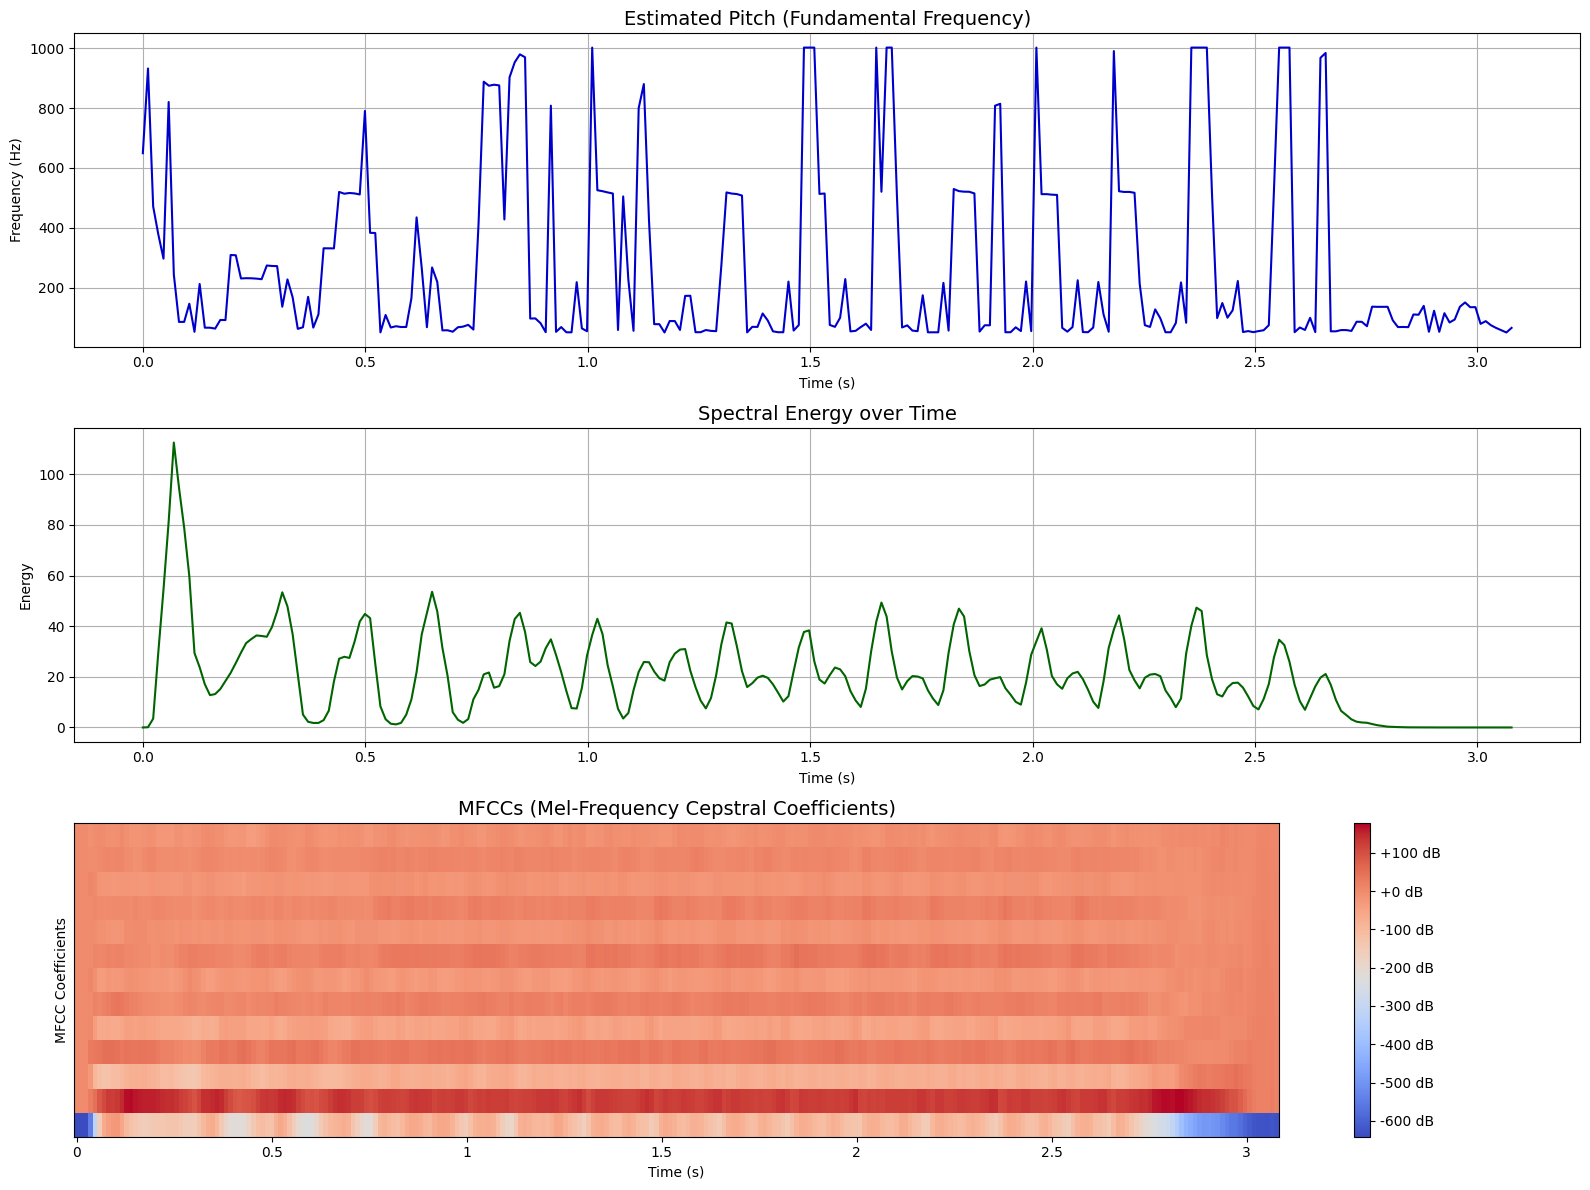

In [8]:
plt.figure(figsize=(16, 12))

# --- 🎤 Plot 1: Pitch ---
plt.subplot(3, 1, 1)
plt.plot(times_pitch, pitch, color='mediumblue')
plt.title("Estimated Pitch (Fundamental Frequency)", fontsize=14)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.grid(True)

# --- 🔋 Plot 2: Spectral Energy ---
plt.subplot(3, 1, 2)
plt.plot(times_energy, energy, color='darkgreen')
plt.title("Spectral Energy over Time", fontsize=14)
plt.ylabel("Energy")
plt.xlabel("Time (s)")
plt.grid(True)

# --- 📈 Plot 3: MFCCs ---
plt.subplot(3, 1, 3)
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title("MFCCs (Mel-Frequency Cepstral Coefficients)", fontsize=14)
plt.ylabel("MFCC Coefficients")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()